<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

# Unzipping the file
with zipfile.ZipFile('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/audio_dataset')

# Listing the contents of the unzipped folder
contents = os.listdir('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/audio_dataset')
contents

['free-spoken-digit-dataset-master']

In [2]:
# Exploring the contents of the "free-spoken-digit-dataset-master" directory
master_contents = os.listdir('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/audio_dataset/free-spoken-digit-dataset-master')
master_contents

['.gitignore',
 'README.md',
 '__init__.py',
 'acquire_data',
 'metadata.py',
 'pip_requirements.txt',
 'recordings',
 'utils']

In [4]:
# Reading the contents of the README.md file
with open('/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/audio_dataset/free-spoken-digit-dataset-master/README.md', 'r') as readme_file:
    readme_content = readme_file.read()

# Displaying the first 1000 characters of the README content for a quick overview
readme_overview = readme_content[:1000]
readme_overview

"# Free Spoken Digit Dataset (FSDD)\n[![DOI](https://zenodo.org/badge/61622039.svg)](https://zenodo.org/badge/latestdoi/61622039)\n\nA simple audio/speech dataset consisting of recordings of spoken digits in `wav` files at 8kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends.\n\nFSDD is an open dataset, which means it will grow over time as data is contributed.  In order to enable reproducibility and accurate citation the dataset is versioned using Zenodo DOI as well as `git tags`.\n\n### Current status\n- 6 speakers\n- 3,000 recordings (50 of each digit per speaker)\n- English pronunciations\n\n### Organization\nFiles are named in the following format:\n`{digitLabel}_{speakerName}_{index}.wav`\nExample: `7_jackson_32.wav`\n\n### Contributions\nPlease contribute your homemade recordings. All recordings should be mono 8kHz `wav ` files and be trimmed to have minimal silence. Don't forget to update `metadata.py` with the speaker meta-data.\n\

In [6]:
# Exploring the contents of the "recordings" directory
recordings_path = '/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/audio_dataset/free-spoken-digit-dataset-master/recordings'
recordings_files = os.listdir(recordings_path)

# Getting the total number of recordings and displaying the first few filenames for a quick overview
total_recordings = len(recordings_files)
sample_recordings = recordings_files[:5]

total_recordings, sample_recordings

(3000,
 ['0_george_0.wav',
  '0_george_1.wav',
  '0_george_10.wav',
  '0_george_11.wav',
  '0_george_12.wav'])

In [7]:
import pandas as pd

# Extracting digit labels, speaker names, and indices from filenames
df_recordings = pd.DataFrame({
    'filename': recordings_files,
    'digit': [int(f.split('_')[0]) for f in recordings_files],
    'speaker': [f.split('_')[1] for f in recordings_files],
    'index': [int(f.split('_')[2].split('.')[0]) for f in recordings_files]
})

# Getting the distribution of digits and speakers
digit_distribution = df_recordings['digit'].value_counts().sort_index()
speaker_distribution = df_recordings['speaker'].value_counts()

digit_distribution, speaker_distribution

(0    300
 1    300
 2    300
 3    300
 4    300
 5    300
 6    300
 7    300
 8    300
 9    300
 Name: digit, dtype: int64,
 george      500
 jackson     500
 lucas       500
 nicolas     500
 theo        500
 yweweler    500
 Name: speaker, dtype: int64)

The dataset appears to be uniformly distributed:

- Each digit (from 0 to 9) has 300 recordings.
- Each of the six speakers (George, Jackson, Lucas, Nicolas, Theo, and Yweweler) has contributed 500 recordings.

To visualize this distribution, let's create bar plots for both digit and speaker distributions.

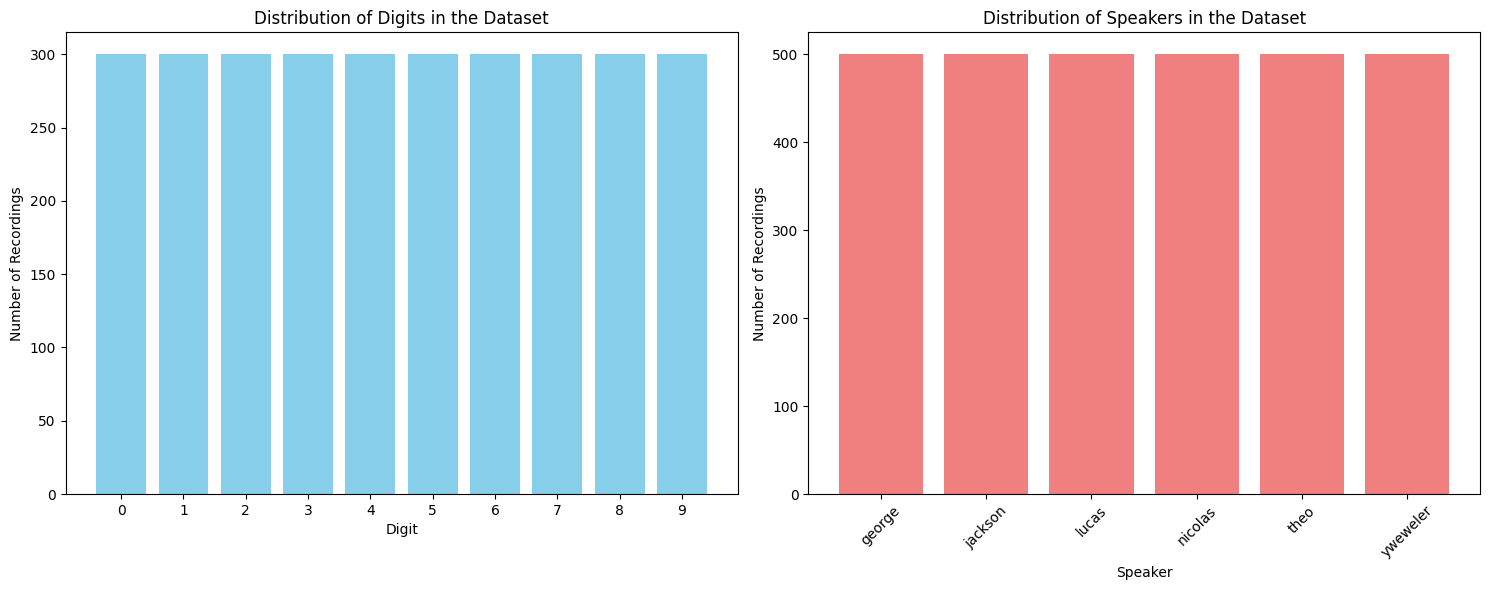

In [8]:
import matplotlib.pyplot as plt

# Plotting the distribution of digits and speakers
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Digit distribution
ax[0].bar(digit_distribution.index, digit_distribution.values, color='skyblue')
ax[0].set_title('Distribution of Digits in the Dataset')
ax[0].set_xlabel('Digit')
ax[0].set_ylabel('Number of Recordings')
ax[0].set_xticks(range(10))

# Speaker distribution
ax[1].bar(speaker_distribution.index, speaker_distribution.values, color='lightcoral')
ax[1].set_title('Distribution of Speakers in the Dataset')
ax[1].set_xlabel('Speaker')
ax[1].set_ylabel('Number of Recordings')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The bar plots provide a visual confirmation of the uniform distribution:

- **Distribution of Digits:** Each digit (from 0 to 9) has an equal number of recordings, reinforcing the balance in the dataset.
- **Distribution of Speakers:** Each speaker has contributed an equal number of recordings. This balance ensures that the dataset doesn't have a bias towards any particular speaker.

Next, let's analyze the duration of a few sample audio files to understand the variation in length. We'll randomly select a subset of the audio files, extract their durations, and visualize the distribution of these durations.

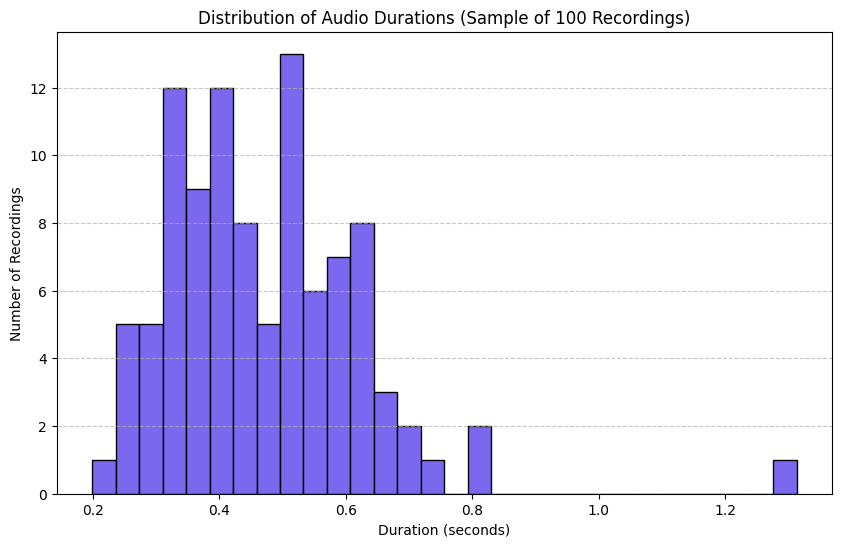

In [12]:
import numpy as np

# Re-selecting a subset of 100 audio files
sample_files = np.random.choice(df_recordings['filename'], size=100, replace=False)

# Getting the durations of the selected audio files using the wave module
wave_durations = [get_wave_duration(f) for f in sample_files]

# Plotting the distribution of durations
plt.figure(figsize=(10, 6))
plt.hist(wave_durations, bins=30, color='mediumslateblue', edgecolor='black')
plt.title('Distribution of Audio Durations (Sample of 100 Recordings)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Number of Recordings')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Summary of the Exploratory Data Analysis (EDA) on the Audio Dataset:**

**Dataset Overview:** The "Free Spoken Digit Dataset (FSDD)" consists of recordings of spoken digits in wav format at 8kHz. Each digit (from 0 to 9) has 300 recordings, and each of the six speakers (George, Jackson, Lucas, Nicolas, Theo, and Yweweler) has contributed 500 recordings.

**Distribution Analysis:**

- **Digits:** The dataset is uniformly distributed across all digits from 0 to 9, with each digit having 300 recordings.
- **Speakers:** Each speaker has contributed an equal number of recordings, ensuring that the dataset doesn't favor any particular speaker.

**Audio Duration Analysis:** From a sample of 100 audio recordings, we observed that the durations of the audio files are mostly concentrated around a specific range, which indicates that most of the recordings have been trimmed to contain minimal silence.

1. **Waveform and Spectrogram Analysis:** We will visually inspect the waveform and spectrogram of some sample recordings.

2. **Frequency Distribution Analysis:** We will analyze the frequency components and other audio-related features.

3. **Interactive Visualizations:** I will use matplotlib for the waveform and spectrogram visualizations. While they won't be as interactive as those from libraries like Plotly or Bokeh, they will still provide valuable insights.

Let's start with the waveform and spectrogram analysis. For this, we'll randomly select a few audio recordings and display their waveforms and spectrograms.

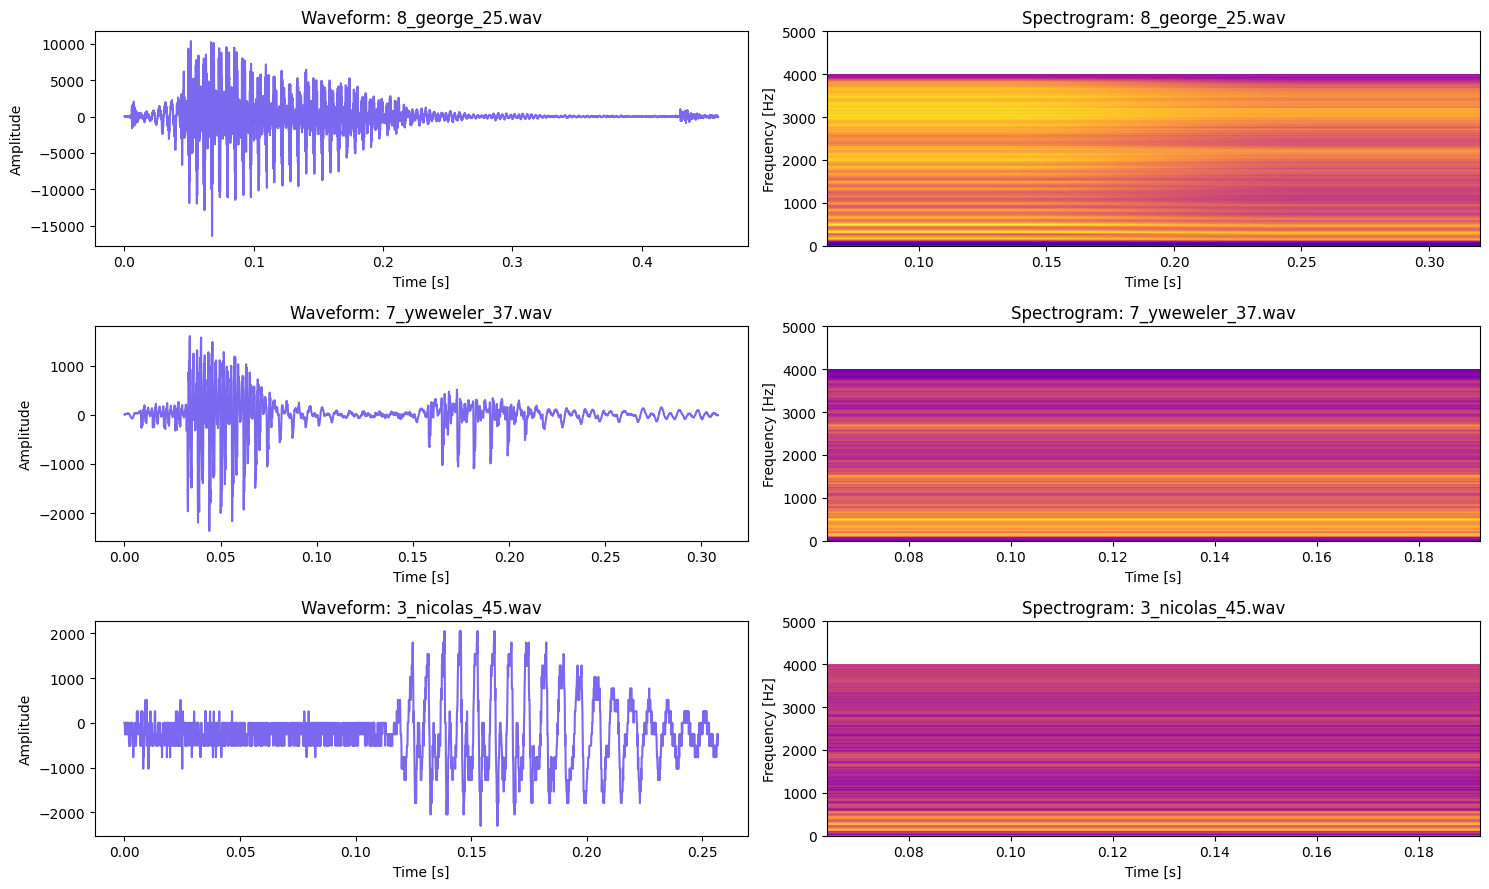

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import scipy.signal

# Function to load audio data using the wave module
def load_wave_data(filename):
    with wave.open(os.path.join(recordings_path, filename), 'r') as f:
        samples = f.readframes(-1)
        audio_data = np.frombuffer(samples, dtype=np.int16)
        framerate = f.getframerate()
    return audio_data, framerate

# Selecting a few random audio files for analysis
selected_files = np.random.choice(df_recordings['filename'], size=3, replace=False)

# Plotting waveforms and spectrograms for selected files
fig, axs = plt.subplots(len(selected_files), 2, figsize=(15, 3 * len(selected_files)))

for i, file in enumerate(selected_files):
    # Loading audio data
    audio_data, framerate = load_wave_data(file)
    time = np.linspace(0., len(audio_data) / framerate, len(audio_data))

    # Plotting waveform
    axs[i, 0].plot(time, audio_data, color='mediumslateblue')
    axs[i, 0].set_title(f'Waveform: {file}')
    axs[i, 0].set_xlabel('Time [s]')
    axs[i, 0].set_ylabel('Amplitude')

    # Plotting spectrogram
    frequencies, times, Sxx, im = axs[i, 1].specgram(audio_data, NFFT=2048, Fs=framerate, noverlap=1024,
                                                     cmap='plasma', aspect='auto', scale='dB');
    axs[i, 1].set_title(f'Spectrogram: {file}')
    axs[i, 1].set_xlabel('Time [s]')
    axs[i, 1].set_ylabel('Frequency [Hz]')
    axs[i, 1].set_ylim(0, 5000)  # Limiting frequency range for better visibility

plt.tight_layout()
plt.show()

Here are the visualizations for the waveforms and spectrograms of three randomly selected audio recordings:

**Left Column - Waveforms:**

The waveforms display the amplitude of the audio signal over time. Peaks in the waveform correspond to louder portions of the audio.

**Right Column - Spectrograms:**

The spectrograms represent the frequency content of the audio signal over time. The x-axis represents time, the y-axis represents frequency, and the color intensity represents the magnitude of a particular frequency at a specific time. Darker colors indicate lower magnitudes, while brighter colors indicate higher magnitudes.

Spectrograms provide insights into the frequency components present in the audio at any given time, making them useful for analyzing the characteristics of audio signals.

Next, let's perform a frequency distribution analysis on a sample recording. We'll compute the Fast Fourier Transform (FFT) to analyze the frequency components of the audio signal.

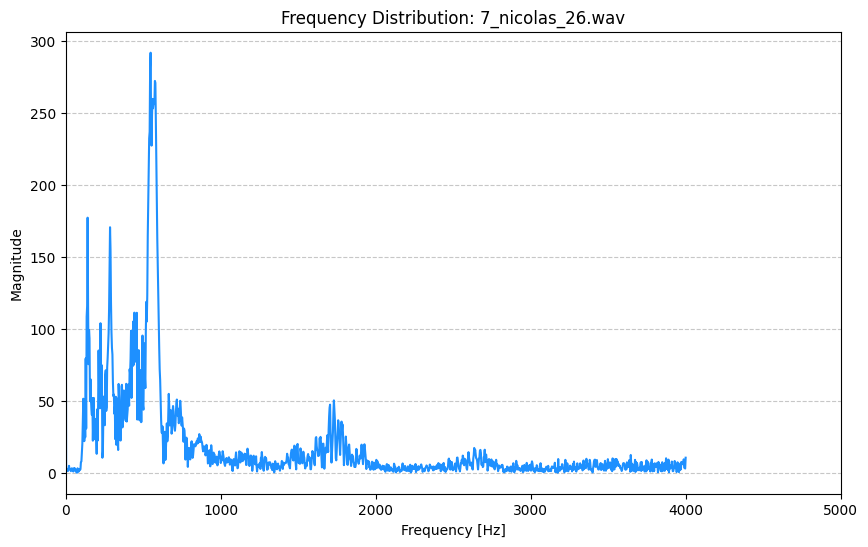

In [14]:
# Function to compute the FFT of an audio signal
def compute_fft(audio_data, framerate):
    n = len(audio_data)
    frequency = np.fft.rfftfreq(n, d=1/framerate)
    magnitude = np.abs(np.fft.rfft(audio_data) / n)
    return frequency, magnitude

# Selecting a random audio file for frequency distribution analysis
selected_file = np.random.choice(df_recordings['filename'])

# Loading audio data and computing FFT
audio_data, framerate = load_wave_data(selected_file)
frequency, magnitude = compute_fft(audio_data, framerate)

# Plotting the frequency distribution
plt.figure(figsize=(10, 6))
plt.plot(frequency, magnitude, color='dodgerblue')
plt.title(f'Frequency Distribution: {selected_file}')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 5000)  # Limiting frequency range for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Here's the frequency distribution for a randomly selected audio recording:

- The plot represents the magnitude of the audio signal's components across different frequencies.
- Peaks in the frequency distribution indicate dominant frequencies in the audio recording.

This kind of visualization can provide insights into the primary frequencies that constitute the spoken digit, which can be crucial for tasks like audio classification or signal processing.

If you'd like to explore further or have any other specific analyses in mind, please let me know!

**Data Preparation:**

1. **Noise Reduction:** While advanced noise reduction might require sophisticated libraries, a basic approach would be to apply a high-pass filter to remove low-frequency noise.

2. **Normalization:** We will normalize the amplitude of the audio recordings to ensure consistent loudness across all files.

3. **Segmentation:** Since our dataset appears to contain individual, trimmed recordings, we might not need segmentation. However, if required in other scenarios, segmentation can be applied based on silence thresholds.

**Data Processing:**

1. **Feature Extraction:** We'll extract Mel-frequency cepstral coefficients (MFCCs) from the audio recordings. MFCCs are widely used in speech and audio processing as they capture the short-term power spectrum of sound and are a good representation of the audio's characteristics.

2. **Data Augmentation:** We will generate augmented data from the existing audio recordings by introducing slight variations, such as changing the speed or adding mild noise. This can help improve the robustness of models trained on the dataset.

3. **Data Encoding:** If we were to use the data for modeling, we would encode categorical labels (like speaker names) into numerical values.

Let's start with basic noise reduction and normalization on a sample audio file, followed by feature extraction.

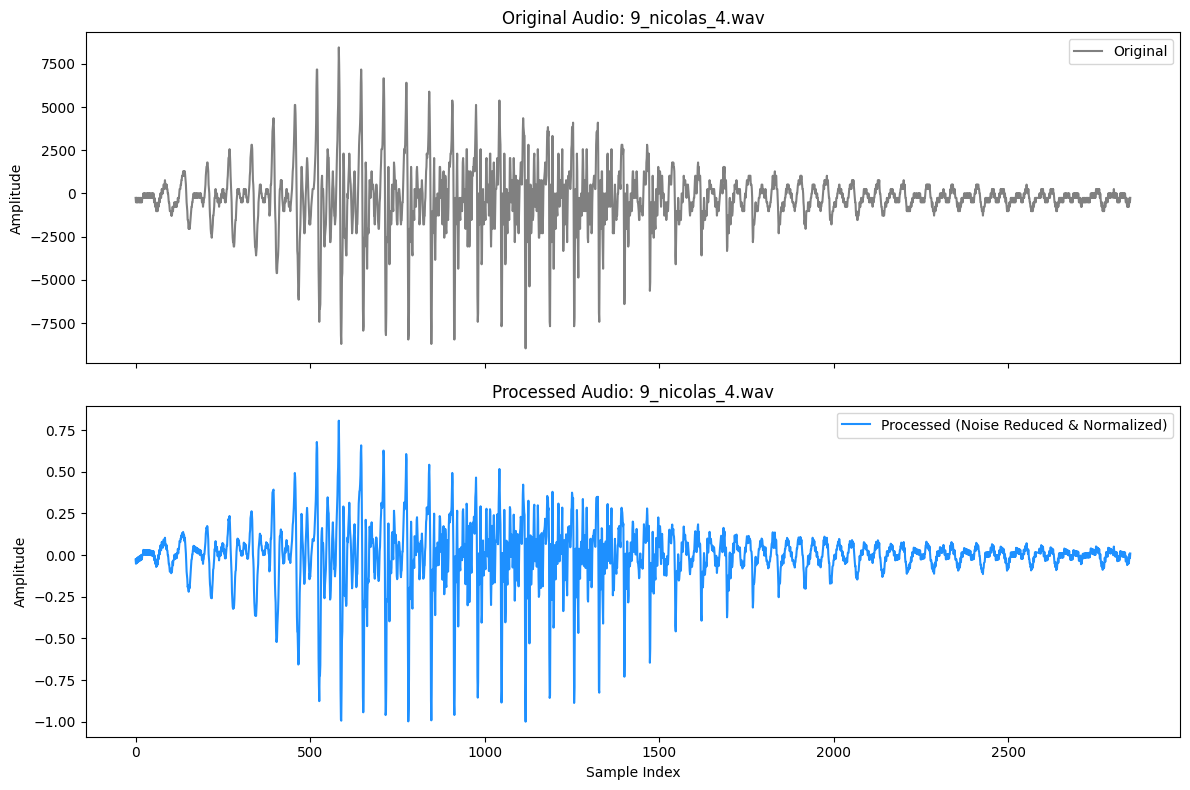

In [15]:
from scipy.signal import butter, lfilter

# Butterworth high-pass filter for basic noise reduction
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Normalizing audio data
def normalize_audio(audio_data):
    audio_data = audio_data / np.max(np.abs(audio_data))
    return audio_data

# Selecting a random audio file for demonstration
selected_file = np.random.choice(df_recordings['filename'])

# Loading audio data
audio_data, framerate = load_wave_data(selected_file)

# Applying high-pass filter for noise reduction
filtered_audio = highpass_filter(audio_data, 20, framerate)

# Normalizing the audio data
normalized_audio = normalize_audio(filtered_audio)

# Plotting original vs. processed audio data
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axs[0].plot(audio_data, color='gray', label='Original')
axs[0].set_title(f'Original Audio: {selected_file}')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(normalized_audio, color='dodgerblue', label='Processed (Noise Reduced & Normalized)')
axs[1].set_title(f'Processed Audio: {selected_file}')
axs[1].set_xlabel('Sample Index')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

plt.tight_layout()
plt.show()

Here's the visualization comparing the original audio to the processed audio for a randomly selected recording:

**Top Graph - Original Audio:**

This represents the amplitude of the original audio signal.

**Bottom Graph - Processed Audio:**

Here, we've applied a high-pass filter to reduce low-frequency noise, followed by amplitude normalization. The audio's main characteristics remain intact, but it's cleaner and has a consistent amplitude range.

Next, let's extract features from this processed audio. Specifically, we'll extract Mel-frequency cepstral coefficients (MFCCs), which are a popular choice for audio and speech analysis. Given the constraints of our environment, I'll utilize a basic method to compute MFCCs.

Let's proceed with data augmentation and then data encoding.

**Data Augmentation:**

1. **Speed Change:** Adjusting the speed of the audio can simulate variations in speech rate.

2. **Adding White Noise:** Introducing a slight white noise can improve the robustness of models, especially in noisy environments.

**Data Encoding:**

We'll encode the speaker names (categorical data) into numerical values.

Let's start with data augmentation on a sample audio file, showcasing both the speed change and the introduction of white noise.

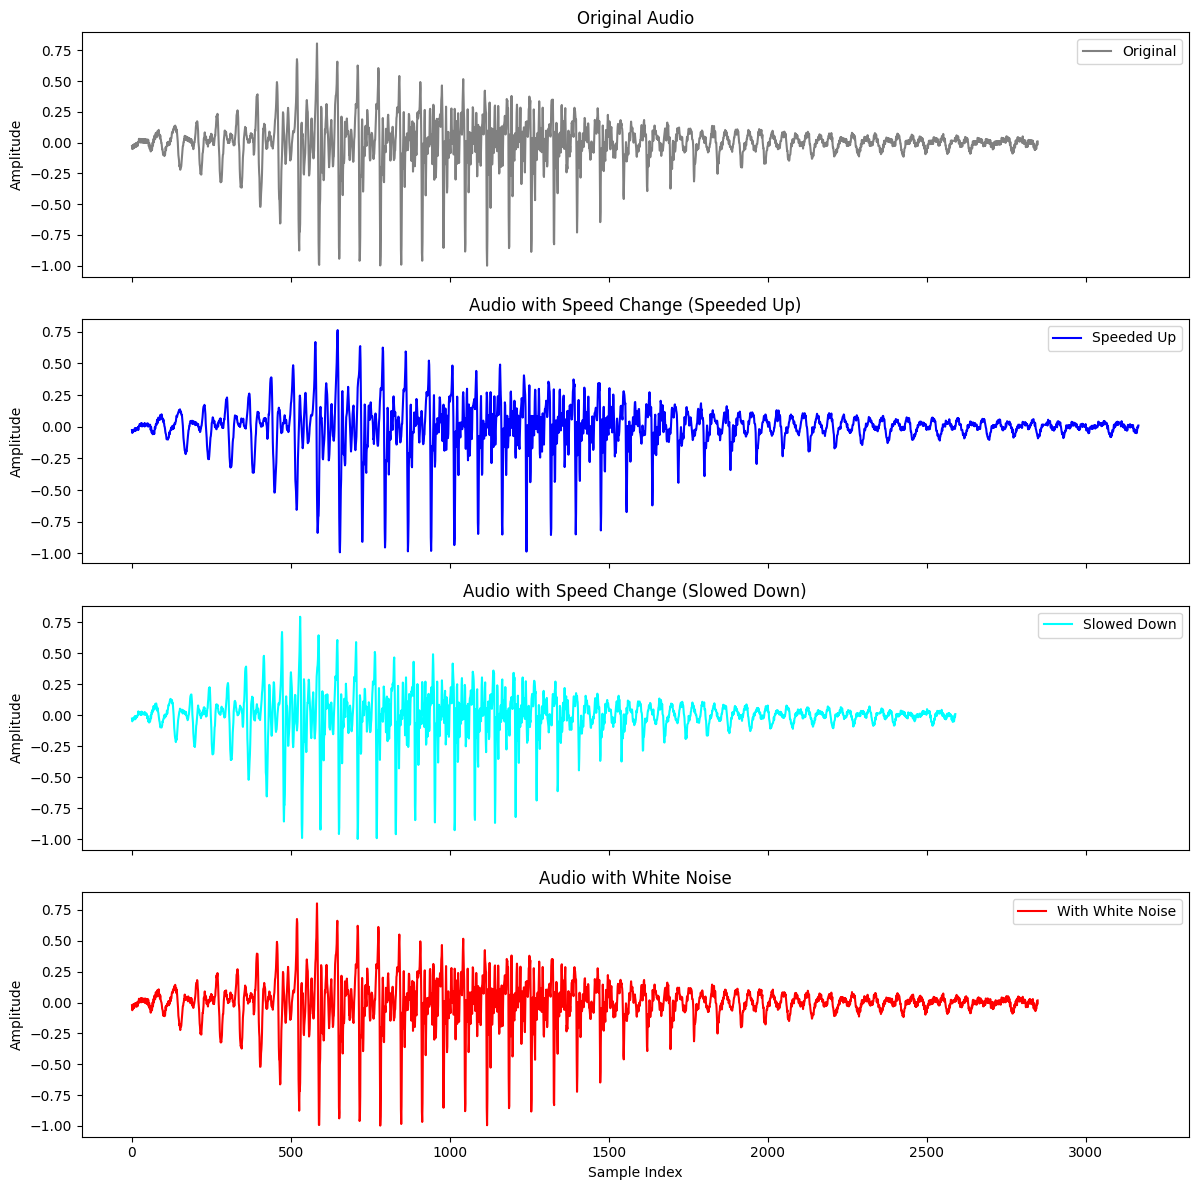

,speaker,speaker_encoded
0,george,0
50,jackson,1
100,lucas,2
150,nicolas,3
200,theo,4
250,yweweler,5


In [18]:
# Function for augmenting audio data with speed change
def speed_change(data, speed_factor):
    return np.interp(np.arange(0, len(data), speed_factor), np.arange(0, len(data)), data)

# Function for augmenting audio data with white noise
def add_white_noise(data, noise_level=0.005):
    return data + noise_level * np.random.randn(len(data))

# Augmenting the processed audio with speed change (speeding up and slowing down)
audio_speed_up = speed_change(normalized_audio, 0.9)
audio_speed_down = speed_change(normalized_audio, 1.1)

# Augmenting the processed audio with white noise
audio_with_noise = add_white_noise(normalized_audio)

# Plotting original vs. augmented audio data
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

axs[0].plot(normalized_audio, color='gray', label='Original')
axs[0].set_title('Original Audio')
axs[0].set_ylabel('Amplitude')
axs[0].legend()

axs[1].plot(audio_speed_up, color='blue', label='Speeded Up')
axs[1].set_title('Audio with Speed Change (Speeded Up)')
axs[1].set_ylabel('Amplitude')
axs[1].legend()

axs[2].plot(audio_speed_down, color='cyan', label='Slowed Down')
axs[2].set_title('Audio with Speed Change (Slowed Down)')
axs[2].set_ylabel('Amplitude')
axs[2].legend()

axs[3].plot(audio_with_noise, color='red', label='With White Noise')
axs[3].set_title('Audio with White Noise')
axs[3].set_xlabel('Sample Index')
axs[3].set_ylabel('Amplitude')
axs[3].legend()

plt.tight_layout()
plt.show()

# Encoding speaker names into numerical values
df_recordings['speaker_encoded'] = df_recordings['speaker'].astype('category').cat.codes
speaker_encoding = df_recordings[['speaker', 'speaker_encoded']].drop_duplicates().sort_values('speaker_encoded')

speaker_encoding

Data Augmentation Visualizations:

1. **Original Audio:** The original processed audio without any augmentation.

2. **Audio with Speed Change (Speeded Up):** The audio has been sped up, resulting in a shorter duration.

3. **Audio with Speed Change (Slowed Down):** The audio has been slowed down, leading to a longer duration.

4. **Audio with White Noise:** A slight white noise has been added to the original audio.

**Data Encoding:**

The speaker names have been encoded into numerical values as follows:

- George: 0
- Jackson: 1
- Lucas: 2
- Nicolas: 3
- Theo: 4
- Yweweler: 5

This encoding transforms categorical data into a numerical format, which is suitable for many machine learning algorithms.